# Healthcare Analytics - The Model and Outputs

In [ ]:
import numpy as np 
import pandas as pd

# Importing the Previous Output

In [ ]:
df = pd.read_csv('../input/healthcare-analytics-problem-eda-preprocessing/final_df.csv')
df

In [ ]:
df.nunique()

# Correlations
Correlations indicate how strongly two columns are related. The default method used is Pearson's correlation, which gives a coefficient as an indication of the strength of the correlation. This coefficient ranges from -1 to +1, where -1 and +1 indicate total negative and positive correlations respectively. A correlation of 0 indicates no correlation at all. If a column is very highly correlated with the target column, it needs to be dropped, as it could bias the results. If two training columns are highly correlated with each other, they have almost the same effect on the results, and only one of those columns is actually required.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
sns.heatmap(df.corr())

# Train-Test Split
* The dataframe is split into the train variables and the target variables. The target column is the column that needs to be predicted, while the train columns help the model decide what to predict. 
* The data used to train the model should not be specific to any section of the data. For example, IDs are unique, and since the test (unseen) data has a new set of IDs altogether, it is not good practice to include the ID column in the training data.

In [ ]:
cols_ignore = ['Patient_ID', 'Health_Score_1', 'Health_Score_2','Number_of_stall_visited', 'Last_Stall_Visited_Number', 'Health_Camp_ID','Registration_Date']
cols_y = ['Outcome']
cols_X = list(set(df.columns) - set(cols_y) - set(cols_ignore))

In [ ]:
X = df[cols_X]
y = df[cols_y]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

# Making Predictions for a Use Case
1. Classification 
  
  Classification involves predicting the categories (two or more) that the labeled data belongs to.

2. Regression
  
  A regression algorithm predicts a set of continuous values based on the training data provided

Both classification and regression are 'supervised', i.e. they work with labels defined by pre-existing (historical) data. 

Since all the data about the patients and health camps is available already, this problem uses supervised learning. Since there are just two possible outcomes based on clearly defined conditions, this is a case of binary classification.

# Models Used
1. Decision Tree - A decision tree algorithm begins with all the data at a root node and uses decision nodes (yes/no) to keep splitting the data. It ends with leaves, i.e. when a particular branch can no longer be split. 
2. Gradient Boosting - Gradient Boosting is a type of ensemble learning, as it uses a collection of 'weaker' models to learn. It uses a loss function which every iteration attempts to minimise.
3. Random Forest Classifier - This is another ensemble method. Decision trees grown very deep tend to learn irregular patterns, and overfit the data. Random forests attempt to eliminate this by growing over randomized parts of the training sets.
4. K Nearest Neighbors - This algorithm creates feature vectors associated with the training labels. During the classification phase, it assigns the unknown vectors the label associated with the 'nearest' vector from the training vectors.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

# Predictions
X_train and y_train are used to fit the models. Each model makes its predictions on X_test

In [ ]:
classifiers = [rfc,gbc,dtc,knn]
preds = []
for clf in classifiers:
    clf.fit(X_train,y_train)
    p = clf.predict(X_test)
    preds.append(p)
    #print(preds)

In [ ]:
columns = ['dtc','gbc','rfc','knn']
preds_df = pd.DataFrame(preds).T
preds_df.columns = columns
preds_df

# Evaluating a Model
The performance of a model can be evaluated using various scores, known as 'metrics'. 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

When a model predicts classifiable data, its output is one of four types for each class - True Positive, False Positive, True Negative, False Negative. A confusion matrix represents these optimally.
This matrix serves as a basis for many classification metrics.

In [ ]:
cm = confusion_matrix(y_test,preds_df['dtc'])
plt.title('Confusion Matrix')
sns.set_palette("pastel")
sns.heatmap(cm, annot = True, cmap = sns.color_palette("viridis"))

# Metrics Used
1. Accuracy - The accuracy is the ratio of the number of correct predictions (TP + TN) and the total no. of predictions.
2. Precision - This is the ratio of true positives (TP) with all the positive predictions (TP + FP).
3. Recall/ True Positive Rate (TPR) - This compares the correct positive predictions (TP) to the number of actual positive data (TP + FN).
4. The ROC AUC Score - This stands for the Area Under the Curve for the Receiver Operator Characteristic Curve. This plots the False Positive Rate (FPR) against the TPR. FPR is given by FP/(TN + FP)
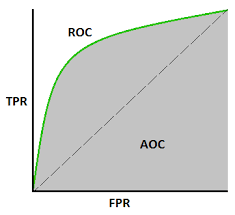****

In [ ]:
scores_list = ['accuracy','precision','recall','roc_auc']
scores_df = pd.DataFrame(index = scores_list, columns = columns)
scores_df

In [ ]:
metrics = [accuracy_score,precision_score,recall_score,roc_auc_score]
for col in preds_df.columns:
    scores = []
    for metric in metrics:
        scores.append(metric(y_test,preds_df[col]))
    scores_df[col] = scores
scores_df

# Visualising the Outputs

In [ ]:
scores_df.plot(figsize = (8,8))